In [ ]:
#used to import files
from google.colab import files
uploaded = files.upload()

Saving health_readmissions - health_readmissions.csv.csv to health_readmissions - health_readmissions.csv.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
df = pd.read_csv('health_readmissions - health_readmissions.csv.csv')

# Initial inspection
print(df.head())
print(df.info())

# Check value distributions
print(df['cholesterol'].value_counts(dropna=False))
print(df['hemoglobin'].value_counts(dropna=False))
print(df['past_visits'].value_counts(dropna=False))
print(df['insurance_status'].value_counts(dropna=False))

# Count missing values
print("Missing cholesterol values:", df['cholesterol'].isnull().sum())

# Fill missing values with domain-specific defaults
df['cholesterol'] = df['cholesterol'].fillna(150.0)
df['hemoglobin'] = df['hemoglobin'].fillna(13.2)
df['past_visits'] = df['past_visits'].fillna(2.0)
df['insurance_status'] = df['insurance_status'].fillna("Private")

# Confirm cleanup
print(df.info())

# Define preprocessing function
def preprocess_for_mi(df, target_col):
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in the dataset.")

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # One-hot encode categorical features
    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

    # Fill any remaining NaNs
    X = X.fillna(0)

    return X, y

# Apply preprocessing
X, y = preprocess_for_mi(df, 'readmitted_within_30days')

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Wrap scores in a Series for readability
mi_series = pd.Series(mi_scores, name="Mutual Information Scores", index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Display top 5 features
top_5_features = mi_series.head(5)
print("Top 5 most relevant features based on Mutual Information:")
print(top_5_features)

   age sex residence_type  systolic_bp  diastolic_bp  cholesterol  hemoglobin  \
0   69   F       Suburban          107            72        171.0        15.9   
1   32   F       Suburban          131            92        235.0        12.7   
2   89   M       Suburban          150            84        150.0        13.0   
3   78   M          Rural          155           107        232.0        12.4   
4   38   M          Urban          153            93        250.0        12.0   

   past_visits  length_of_stay insurance_status  readmitted_within_30days  
0          5.0               7           Public                         0  
1          5.0               7          Private                         0  
2          0.0               5          Private                         0  
3          2.0               6              NaN                         0  
4          4.0               4          Private                         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 en

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X and y are already defined from previous steps
# If not, load the data and preprocess it here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Selection
selected_features = []
remaining_features = list(X_train.columns)
best_score = 0

print("Starting Forward Selection...")

while remaining_features:
    scores_with_candidates = []

    for candidate_feature in remaining_features:
        current_features = selected_features + [candidate_feature]

        # Ensure all current_features are in X_train before training
        if all(f in X_train.columns for f in current_features):
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train[current_features], y_train)
            y_pred = model.predict(X_test[current_features])
            score = accuracy_score(y_test, y_pred)
            scores_with_candidates.append((score, candidate_feature))
        else:
            print(f"Skipping {candidate_feature} as it's not in X_train columns.")


    # Select the best feature among candidates
    if scores_with_candidates:
        scores_with_candidates.sort(reverse=True)
        best_candidate_score, best_candidate_feature = scores_with_candidates[0]

        if best_candidate_score > best_score:
            best_score = best_candidate_score
            selected_features.append(best_candidate_feature)
            remaining_features.remove(best_candidate_feature)
            print(f"Selected: {best_candidate_feature} (Score: {best_score:.4f})")
        else:
            print("No further improvement. Stopping selection.")
            break
    else:
        print("No candidate features to evaluate. Stopping selection.")
        break

print("\nFinal selected features:")
print(selected_features)

Starting Forward Selection...
Selected: sex_M (Score: 0.9125)
No further improvement. Stopping selection.

Final selected features:
['sex_M']


In [ ]:
import pandas as pd
# df = pd.read_csv('train.csv')
df = pd.read_csv('health_readmissions - health_readmissions.csv.csv')

print(df.head())
print(df.info())
print(df['cholesterol'].value_counts())#to see the value that appears the most in this column
print(df['hemoglobin'].value_counts())
print(df['past_visits'].value_counts())
print(df['insurance_status'].value_counts())
print(len(df[pd.isnull(df['cholesterol'])]))
# Replace the null value ('NaN') of the rating ('Rating') for such apps with -1.
df['cholesterol'] = df['cholesterol'].fillna(150.0)#to replace the empty values with the value that appears the most
df['hemoglobin'] = df['hemoglobin'].fillna(13.2)
df['past_visits'] = df['past_visits'].fillna(2.0)
df['insurance_status'] = df['insurance_status'].fillna("Private")
print(df.info())

   age sex residence_type  systolic_bp  diastolic_bp  cholesterol  hemoglobin  \
0   69   F       Suburban          107            72        171.0        15.9   
1   32   F       Suburban          131            92        235.0        12.7   
2   89   M       Suburban          150            84        150.0        13.0   
3   78   M          Rural          155           107        232.0        12.4   
4   38   M          Urban          153            93        250.0        12.0   

   past_visits  length_of_stay insurance_status  readmitted_within_30days  
0          5.0               7           Public                         0  
1          5.0               7          Private                         0  
2          0.0               5          Private                         0  
3          2.0               6              NaN                         0  
4          4.0               4          Private                         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 en

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming X and y are already defined from previous steps
# If not, load the data and preprocess it here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Selection
selected_features = []
remaining_features = list(X_train.columns)
best_score = 0

print("Starting Forward Selection...")

while remaining_features:
    scores_with_candidates = []

    for candidate_feature in remaining_features:
        current_features = selected_features + [candidate_feature]

        # Ensure all current_features are in X_train before training
        if all(f in X_train.columns for f in current_features):
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train[current_features], y_train)
            y_pred = model.predict(X_test[current_features])
            score = accuracy_score(y_test, y_pred)
            scores_with_candidates.append((score, candidate_feature))
        else:
            print(f"Skipping {candidate_feature} as it's not in X_train columns.")


    # Select the best feature among candidates
    if scores_with_candidates:
        scores_with_candidates.sort(reverse=True)
        best_candidate_score, best_candidate_feature = scores_with_candidates[0]

        if best_candidate_score > best_score:
            best_score = best_candidate_score
            selected_features.append(best_candidate_feature)
            remaining_features.remove(best_candidate_feature)
            print(f"Selected: {best_candidate_feature} (Score: {best_score:.4f})")
        else:
            print("No further improvement. Stopping selection.")
            break
    else:
        print("No candidate features to evaluate. Stopping selection.")
        break

print("\nFinal selected features:")
print(selected_features)

Starting Forward Selection...
Selected: sex_M (Score: 0.9125)
No further improvement. Stopping selection.

Final selected features:
['sex_M']


In [ ]:
QUESTION 2:


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
df = pd.read_csv('/content/health_readmissions.csv', sep=';')

# Initial inspection
print(df.head())
print(df.info())

# Check value distributions
print(df['cholesterol'].value_counts(dropna=False))
print(df['hemoglobin'].value_counts(dropna=False))
print(df['past_visits'].value_counts(dropna=False))
print(df['insurance_status'].value_counts(dropna=False))

# Count missing values
print("Missing cholesterol values:", df['cholesterol'].isnull().sum())

# Fill missing values with domain-specific defaults
df['cholesterol'] = df['cholesterol'].fillna(150.0)
df['hemoglobin'] = df['hemoglobin'].fillna(13.2)
df['past_visits'] = df['past_visits'].fillna(2.0)
df['insurance_status'] = df['insurance_status'].fillna("Private")

# Confirm cleanup
print(df.info())

# Define preprocessing function
def preprocess_for_mi(df, target_col):
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in the dataset.")

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # One-hot encode categorical features
    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

    # Fill any remaining NaNs
    X = X.fillna(0)

    return X, y

# Apply preprocessing
X, y = preprocess_for_mi(df, 'readmitted_within_30days')

# Compute Mutual Information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Wrap scores in a Series for readability
mi_series = pd.Series(mi_scores, name="Mutual Information Scores", index=X.columns)
mi_series = mi_series.sort_values(ascending=False)

# Display top 5 features
top_5_features = mi_series.head(5)
print("Top 5 most relevant features based on Mutual Information:")
print(top_5_features)

   age sex residence_type  systolic_bp  diastolic_bp  cholesterol  hemoglobin  \
0   69   F       Suburban          107            72        171.0        15.9   
1   32   F       Suburban          131            92        235.0        12.7   
2   89   M       Suburban          150            84        150.0        13.0   
3   78   M          Rural          155           107        232.0        12.4   
4   38   M          Urban          153            93        250.0        12.0   

   past_visits  length_of_stay insurance_status  readmitted_within_30days  
0          5.0               7           Public                         0  
1          5.0               7          Private                         0  
2          0.0               5          Private                         0  
3          2.0               6              NaN                         0  
4          4.0               4          Private                         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 en

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are already defined and preprocessed from previous steps
# If not, load the data and preprocess it here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a Logistic Regression model
print("Training Logistic Regression model...")
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Evaluate the Logistic Regression model
y_pred_lr = log_reg_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"\nLogistic Regression Model Accuracy: {accuracy_lr:.4f}")
print("Logistic Regression Classification Report:")
print(report_lr)

# 2. Train a Random Forest Classifier model
print("\nTraining Random Forest Classifier model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest Classifier model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Classifier Model Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:")
print(report_rf)

Training Logistic Regression model...

Logistic Regression Model Accuracy: 0.9150
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       365
           1       0.53      0.26      0.35        35

    accuracy                           0.92       400
   macro avg       0.73      0.62      0.65       400
weighted avg       0.90      0.92      0.90       400


Training Random Forest Classifier model...

Random Forest Classifier Model Accuracy: 0.9150
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       365
           1       0.56      0.14      0.23        35

    accuracy                           0.92       400
   macro avg       0.74      0.57      0.59       400
weighted avg       0.89      0.92      0.89       400



 b. Explain how you handled missing data in the dataset and describe the hyperparameters
 chosen for each model. (5 marks

 Question 3: (20 marks)
 a. Evaluate both models using 5-fold cross-validation. Report Accuracy, Precision, Recall,
 F1-score, and ROC-AUC. Present the results in a comparative table. (8 marks)

In [ ]:
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined from previous steps

# Define the models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform 5-fold cross-validation for Logistic Regression
print("Performing 5-fold cross-validation for Logistic Regression...")
cv_results_lr = cross_validate(log_reg_model, X, y, cv=5, scoring=scoring)

# Perform 5-fold cross-validation for Random Forest Classifier
print("Performing 5-fold cross-validation for Random Forest Classifier...")
cv_results_rf = cross_validate(rf_model, X, y, cv=5, scoring=scoring)

# Create a table to compare the results
results_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [cv_results_lr['test_accuracy'].mean(), cv_results_rf['test_accuracy'].mean()],
    'Precision': [cv_results_lr['test_precision'].mean(), cv_results_rf['test_precision'].mean()],
    'Recall': [cv_results_lr['test_recall'].mean(), cv_results_rf['test_recall'].mean()],
    'F1-score': [cv_results_lr['test_f1'].mean(), cv_results_rf['test_f1'].mean()],
    'ROC-AUC': [cv_results_lr['test_roc_auc'].mean(), cv_results_rf['test_roc_auc'].mean()]
})

print("\nCross-Validation Results (5-fold):")
display(results_table)

Performing 5-fold cross-validation for Logistic Regression...
Performing 5-fold cross-validation for Random Forest Classifier...

Cross-Validation Results (5-fold):


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.8885,0.621201,0.269388,0.372183,0.852468
1,Random Forest,0.8900,0.728571,0.171429,0.274939,0.804111


b. Plot the ROC curves for both models on the same graph and discuss what the curves
 reveal about trade-offs between sensitivity and specificity. (6 marks)

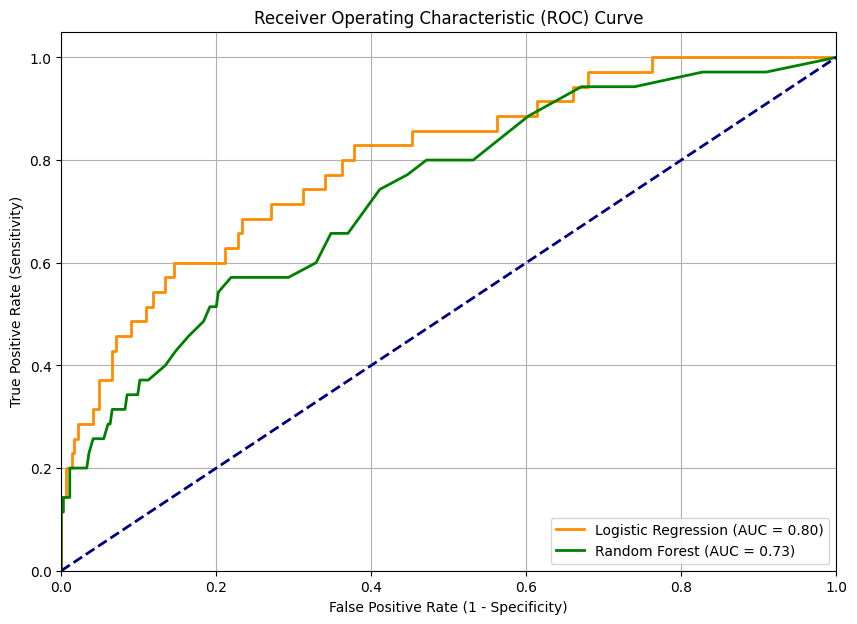

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous steps
# If not, load the data and preprocess it here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get the predicted probabilities for the positive class (class 1)
y_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

c. Conduct a statistical significance test (e.g., McNemar’s test or a paired t-test) to de
termine whether the difference in performance between the Logistic Regression and
 Random Forest models is statistically significant. Present your methodology, results,
 and interpretation. (6 marks)

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous steps

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions on the test set
y_pred_lr = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Create a contingency table
# The contingency table for McNemar's test is structured as follows:
#             Predicted by Model 1 (Positive)  Predicted by Model 1 (Negative)
# Predicted by Model 2 (Positive)     a (both correct)          b (Model 1 incorrect, Model 2 correct)
# Predicted by Model 2 (Negative)     c (Model 1 correct, Model 2 incorrect)  d (both incorrect)

# We need to compare where the models disagree:
# b: cases where LR is wrong and RF is right
# c: cases where LR is right and RF is wrong

contingency_table = pd.crosstab(y_pred_lr, y_pred_rf)
print("Contingency Table for McNemar's Test:")
print(contingency_table)

# Perform McNemar's test
# McNemar's test is sensitive to the off-diagonal elements (b and c)
# In our case, the table will show:
# Rows: Logistic Regression predictions
# Columns: Random Forest predictions

# So, the table cells correspond to:
# Rows=0, Cols=0: LR=0, RF=0 (Both predicted 0)
# Rows=0, Cols=1: LR=0, RF=1 (LR predicted 0, RF predicted 1) - This is 'c' in the standard McNemar table structure (LR correct, RF incorrect assuming true is 0)
# Rows=1, Cols=0: LR=1, RF=0 (LR predicted 1, RF predicted 0) - This is 'b' in the standard McNemar table structure (LR incorrect, RF correct assuming true is 1)
# Rows=1, Cols=1: LR=1, RF=1 (Both predicted 1)

# To correctly apply McNemar's test, we need to build the 2x2 table based on correct/incorrect predictions.
# Let's count the cases:
# case 11: LR correct, RF correct (y_test == y_pred_lr and y_test == y_pred_rf)
# case 01: LR incorrect, RF correct (y_test != y_pred_lr and y_test == y_pred_rf)
# case 10: LR correct, RF incorrect (y_test == y_pred_lr and y_test != y_pred_rf)
# case 00: LR incorrect, RF incorrect (y_test != y_pred_lr and y_test != y_pred_rf)

case_11 = sum((y_test == y_pred_lr) & (y_test == y_pred_rf))
case_01 = sum((y_test != y_pred_lr) & (y_test == y_pred_rf))
case_10 = sum((y_test == y_pred_lr) & (y_test != y_pred_rf))
case_00 = sum((y_test != y_pred_lr) & (y_test != y_pred_rf))

mcnemar_table = [[case_11, case_10],
                 [case_01, case_00]]

print("\nMcNemar's Test Input Table:")
print(mcnemar_table)

result = mcnemar(mcnemar_table)

# Extracting the p-value
p_value = result.pvalue

print(f"\nMcNemar's Test p-value: {p_value:.4f}")

Contingency Table for McNemar's Test:
col_0    0  1
row_0        
0      382  1
1        9  8

McNemar's Test Input Table:
[[361, 5], [5, 29]]

McNemar's Test p-value: 1.0000
